<a href="https://colab.research.google.com/github/ramswaroopbhakar14/Upvotes-prediction/blob/master/Upvote_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
! git clone https://github.com/ramswaroopbhakar14/Upvotes-prediction.git

fatal: destination path 'Upvotes-prediction' already exists and is not an empty directory.


In [423]:
%cd /content/Upvotes-prediction/data

/content/Upvotes-prediction/data


In [0]:
import pandas as pd
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

"creating copy of both train & test for further uses"
train_data1 = train_data.copy()
test_data1 = test_data.copy()

In [425]:
print("train columns:\n",train_data.columns)
print("test columns:\n",test_data.columns)

train columns:
 Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')
test columns:
 Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')


Print train & test head data

In [426]:
print("train sample:\n",train_data.head())
print("test sample:\n",test_data.head())

train sample:
        ID Tag  Reputation  Answers  Username    Views  Upvotes
0   52664   a      3942.0      2.0    155623   7855.0     42.0
1  327662   a     26046.0     12.0     21781  55801.0   1175.0
2  468453   c      1358.0      4.0     56177   8067.0     60.0
3   96996   a       264.0      3.0    168793  27064.0      9.0
4  131465   c      4271.0      4.0    112223  13986.0     83.0
test sample:
        ID Tag  Reputation  Answers  Username    Views
0  366953   a      5645.0      3.0     50652  33200.0
1   71864   c     24511.0      6.0     37685   2730.0
2  141692   i       927.0      1.0    135293  21167.0
3  316833   i        21.0      6.0    166998  18528.0
4  440445   i      4475.0     10.0     53504  57240.0


dropping non-important features

In [0]:
train_data = train_data1.drop(columns=['ID','Username'])
test_data = test_data1.drop(columns=['ID','Username'])

Train-Corr-Matrix:
             Reputation   Answers     Views   Upvotes
Reputation    1.000000  0.066504  0.036455  0.266710
Answers       0.066504  1.000000  0.498642  0.202033
Views         0.036455  0.498642  1.000000  0.437336
Upvotes       0.266710  0.202033  0.437336  1.000000
Test-Corr-Matrix:
             Reputation   Answers     Views
Reputation    1.000000  0.072639  0.038193
Answers       0.072639  1.000000  0.517076
Views         0.038193  0.517076  1.000000


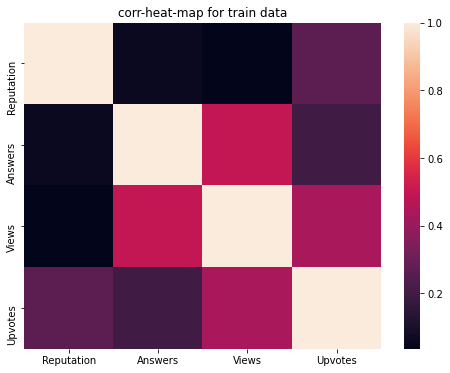

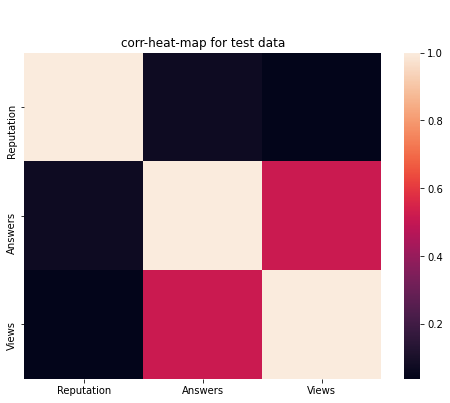

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.title("corr-heat-map for train data")
"find correlation matrix"
train_corr = train_data.corr()
print("Train-Corr-Matrix:\n", train_corr)
"generating heatmap using train_corr"
sns.heatmap(train_corr) # we don't see any var-pair haivng > 0.5 correlation, hence we'll be directly going for model building

plt.figure(figsize=[8,6])
plt.title("\n\ncorr-heat-map for test data")
"find correlation matrix for test data"
test_corr = test_data.corr()
print("Test-Corr-Matrix:\n", test_corr)
"generating heatmap using test_corr"
sns.heatmap(test_corr) 

plotting each of feature w.r.t. **Upvotes**


Text(0, 0.5, 'Upvotes')

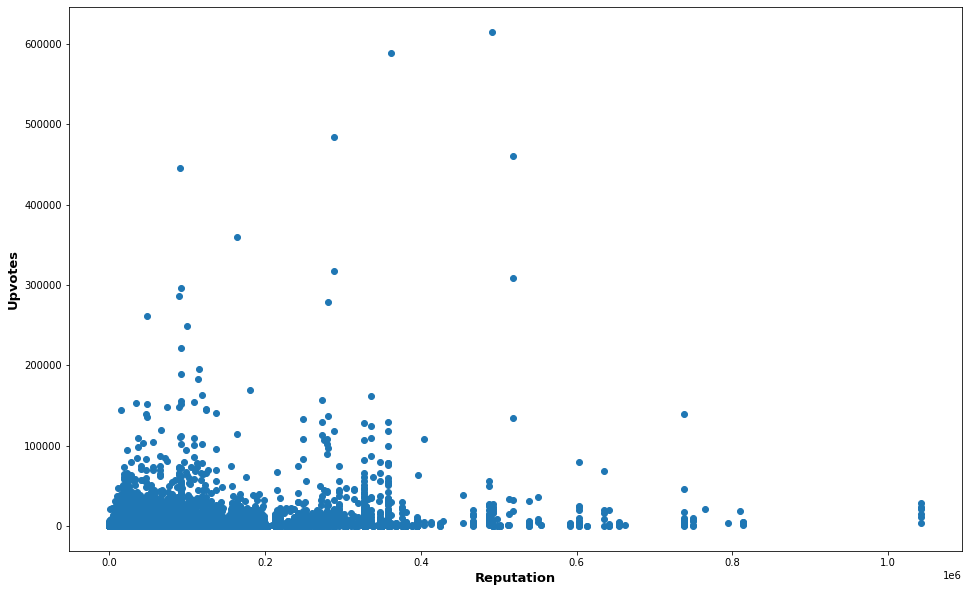

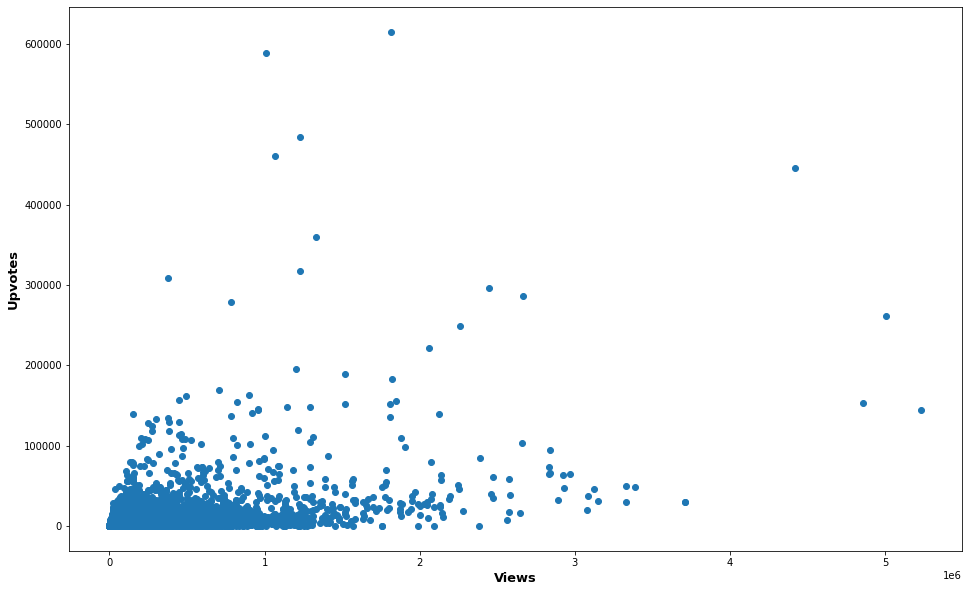

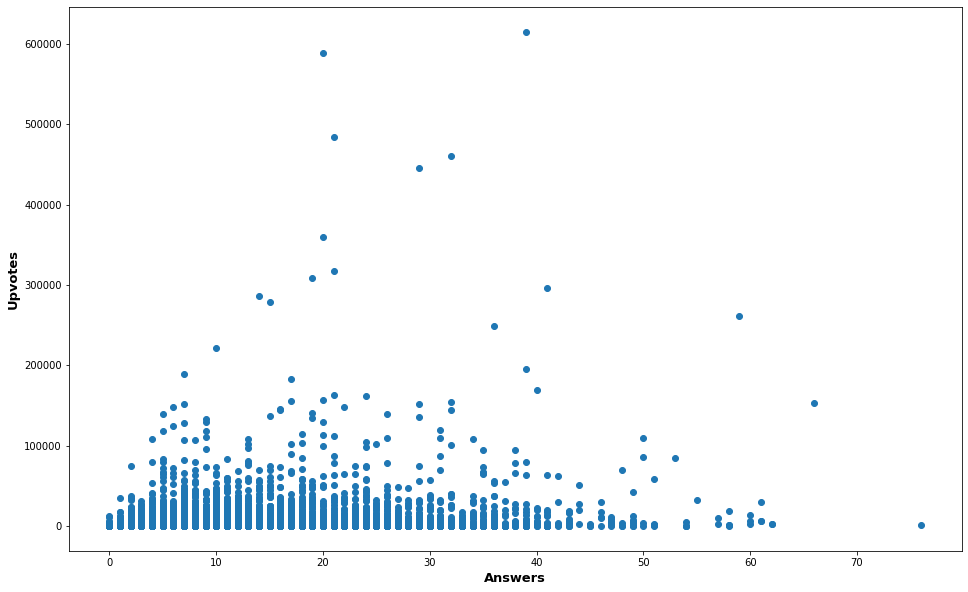

In [429]:
plt.figure(figsize=[16,10])
plt.plot(train_data['Reputation'], train_data['Upvotes'],'o')
plt.xlabel('Reputation', fontweight='bold', fontsize=13)
plt.ylabel('Upvotes', fontweight='bold', fontsize=13)

plt.figure(figsize=[16,10])
plt.plot(train_data['Views'], train_data['Upvotes'],'o')
plt.xlabel('Views', fontweight='bold', fontsize=13)
plt.ylabel('Upvotes', fontweight='bold', fontsize=13)

plt.figure(figsize=[16,10])
plt.plot(train_data['Answers'], train_data['Upvotes'],'o')
plt.xlabel('Answers', fontweight='bold', fontsize=13)
plt.ylabel('Upvotes', fontweight='bold', fontsize=13)

Converting cartegorical to numerical features ('Tag')

In [0]:
"Dealing with categorical features in a regression problem"

"First approach: to convert each category as sdummy variables"
#train_data = pd.concat([train_data.loc[:, train_data.columns!='Tag'], pd.get_dummies(train_data[['Tag']])], axis=1)
#test_data = pd.concat([test_data.loc[:, test_data.columns!='Tag'], pd.get_dummies(test_data[['Tag']])], axis=1)

"Second approach: to convert each category as a numerical label"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data['Tag']) # fitting label encoder for 'Tag'
train_data['Tag'] = le.transform(train_data['Tag']) # label transforming 'Tag' for train_data
test_data['Tag'] = le.transform(test_data['Tag']) # label transforming 'Tag' for test_data

In [431]:
print("train columns:\n",train_data.columns)
print("test columns:\n",test_data.columns)

train columns:
 Index(['Tag', 'Reputation', 'Answers', 'Views', 'Upvotes'], dtype='object')
test columns:
 Index(['Tag', 'Reputation', 'Answers', 'Views'], dtype='object')


In [432]:
print(train_data.head())
print(test_data.head())

   Tag  Reputation  Answers    Views  Upvotes
0    0      3942.0      2.0   7855.0     42.0
1    0     26046.0     12.0  55801.0   1175.0
2    1      1358.0      4.0   8067.0     60.0
3    0       264.0      3.0  27064.0      9.0
4    1      4271.0      4.0  13986.0     83.0
   Tag  Reputation  Answers    Views
0    0      5645.0      3.0  33200.0
1    1     24511.0      6.0   2730.0
2    3       927.0      1.0  21167.0
3    3        21.0      6.0  18528.0
4    3      4475.0     10.0  57240.0


In [433]:
"data pre-processing"
train_summary = train_data.describe()
test_summary = test_data.describe()

print(train_summary)
print(test_summary)

"missing data summary"
summary_na_train= [train_data[x].isna().sum() for x in train_data.columns] # we don't have any nan values in this data
summary_na_test= [test_data[x].isna().sum() for x in test_data.columns] # we don't have any nan values in this data

print(summary_na_train)
print(summary_na_test)

                Tag    Reputation        Answers         Views        Upvotes
count  330045.00000  3.300450e+05  330045.000000  3.300450e+05  330045.000000
mean        3.54305  7.773147e+03       3.917672  2.964507e+04     337.505358
std         2.49392  2.706141e+04       3.579515  8.095646e+04    3592.441135
min         0.00000  0.000000e+00       0.000000  9.000000e+00       0.000000
25%         1.00000  2.820000e+02       2.000000  2.594000e+03       8.000000
50%         4.00000  1.236000e+03       3.000000  8.954000e+03      28.000000
75%         6.00000  5.118000e+03       5.000000  2.687000e+04     107.000000
max         9.00000  1.042428e+06      76.000000  5.231058e+06  615278.000000
                 Tag    Reputation        Answers         Views
count  141448.000000  1.414480e+05  141448.000000  1.414480e+05
mean        3.552542  7.920927e+03       3.914873  2.984633e+04
std         2.494553  2.791072e+04       3.577460  8.034374e+04
min         0.000000  0.000000e+00       0

In [434]:
"some manual analysis"
print("for Reputation")
for p1 in np.arange(0,100,11):
  print(str(p1)+'-percentile: ' 'train_data-{}, test_data-{}'.format(np.percentile(train_data['Reputation'],p1),np.percentile(test_data['Reputation'],p1)))
  
print("for Views")
for p1 in np.arange(0,100,11):
  print(str(p1)+'-percentile: ' 'train_data-{}, test_data-{}'.format(np.percentile(train_data['Views'],p1),np.percentile(test_data['Views'],p1)))

  
print("for Answers")
for p1 in np.arange(0,100,11):
  print(str(p1)+'-percentile: ' 'train_data-{}, test_data-{}'.format(np.percentile(train_data['Answers'],p1),np.percentile(test_data['Answers'],p1)))

for Reputation
0-percentile: train_data-0.0, test_data-0.0
11-percentile: train_data-62.0, test_data-62.0
22-percentile: train_data-186.0, test_data-187.0
33-percentile: train_data-473.0, test_data-478.0
44-percentile: train_data-886.0, test_data-893.0
55-percentile: train_data-1628.0, test_data-1646.8500000000058
66-percentile: train_data-2966.0, test_data-2986.0
77-percentile: train_data-5802.0, test_data-5810.0
88-percentile: train_data-13610.0, test_data-13756.0
99-percentile: train_data-113925.0, test_data-114888.0
for Views
0-percentile: train_data-9.0, test_data-9.0
11-percentile: train_data-818.0, test_data-829.0
22-percentile: train_data-2132.0, test_data-2145.0
33-percentile: train_data-4075.0, test_data-4064.0
44-percentile: train_data-6874.0, test_data-6905.0
55-percentile: train_data-11093.0, test_data-11100.850000000006
66-percentile: train_data-17761.0, test_data-17837.0
77-percentile: train_data-29728.880000000005, test_data-29904.0
88-percentile: train_data-58090.0, te

Generating some discrete features from continuous features

In [0]:
# from sklearn.preprocessing import Binarizer

# # #for 'Reputation'
# bn_repu = Binarizer(threshold=1e5)
# repu_train = bn_repu.transform([train_data['Reputation']])[0]
# train_data['Repu_grade'] = repu_train
# repu_test = bn_repu.transform([test_data['Reputation']])[0]
# test_data['Repu_grade'] = repu_test

# #for 'Answers'
# bn_ans = Binarizer(threshold=7)
# ans_train = bn_ans.transform([train_data['Answers']])[0]
# train_data['Answer_grade'] = ans_train
# ans_test = bn_ans.transform([test_data['Answers']])[0]
# test_data['Answer_grade'] = ans_test

# # #for 'Views'
# bn_view = Binarizer(threshold=5e5)
# view_train = bn_view.transform([train_data['Views']])[0]
# train_data['View_grade'] = view_train
# view_test = bn_view.transform([test_data['Views']])[0]
# test_data['View_grade'] = view_test

Box-plots of train-test data & data selection

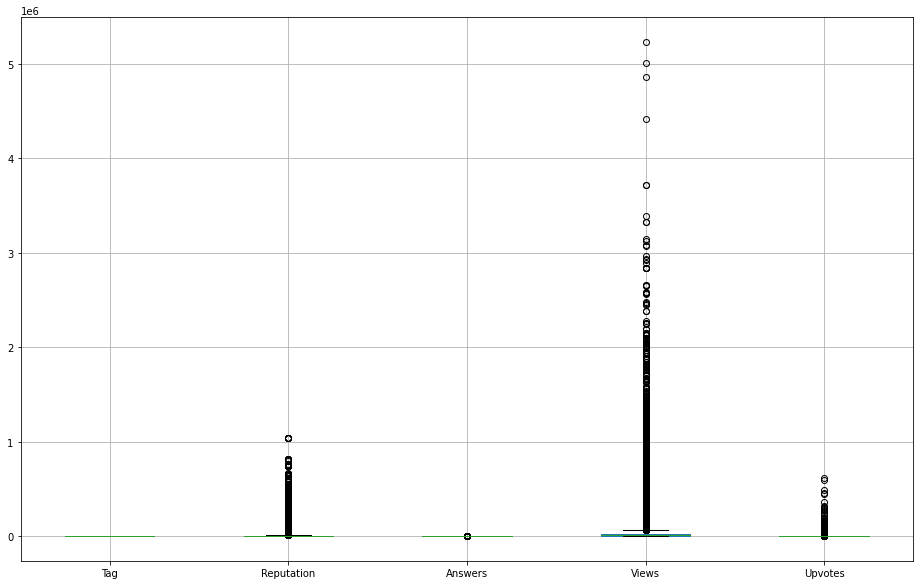

In [436]:
"train box-plot"
plt.figure(figsize=[16,10])
train_data.boxplot()

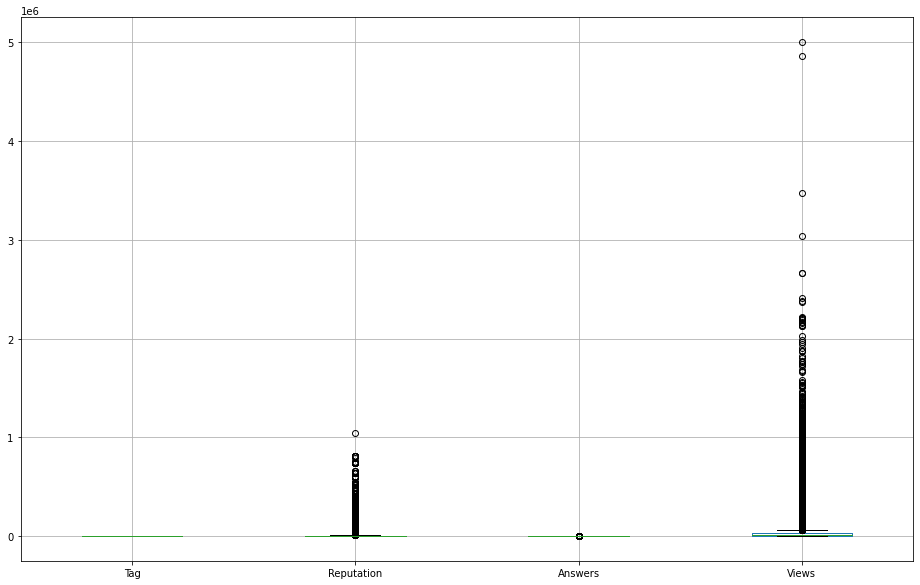

In [437]:
"test box-plot"
plt.figure(figsize=[16,10])
test_data.boxplot()

treating outliers of training data for better model fitment

train shape before outlier removal: (330045, 5)
train shape after 1st outlier treatment: (330032, 5)


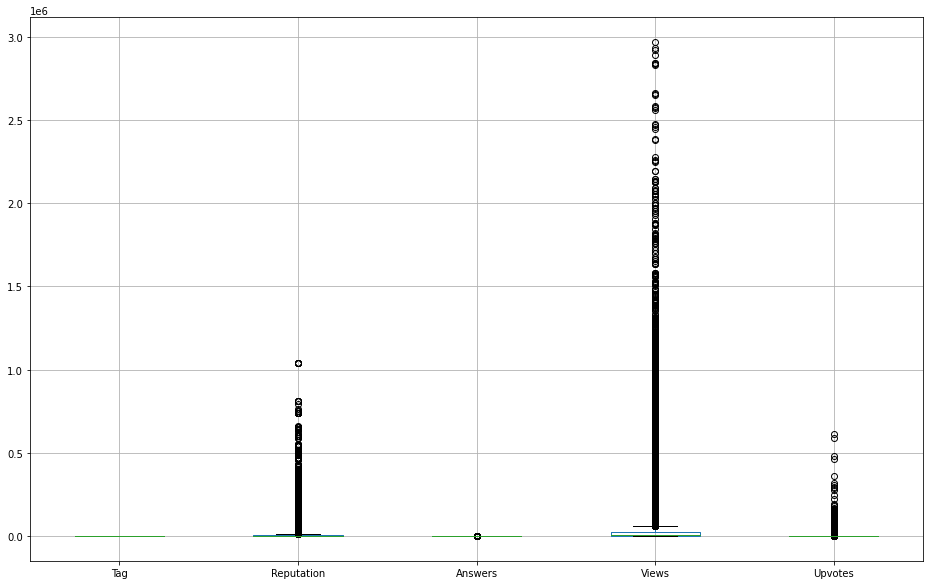

In [438]:
"First approach: we have tried with below approach but it's not good for test data"
# from scipy import stats
# "we'll drop those values of a columns where (value>97.85th percentile of that columns) or (value<0.13 percentile of that columns)"
# train_data = train_data[(np.abs(stats.zscore(train_data)) < 3).all(axis=1)]
# "train box-plot"
# plt.figure(figsize=[16,10])
# train_data.boxplot()

print('train shape before outlier removal:', train_data.shape)
"second approach: we'll be manually removing some values which are not much observed in test data"
#1st: drop rows where 'Reputation' is > 1e6"
# train_data = train_data.drop(train_data[train_data.Reputation>1*1e6].index).reset_index(drop=['index'])
# print('train shape after 1st outlier treatment:', train_data.shape)

#2nd: drop rows where 'Reputation' is > 3e6"
train_data = train_data.drop(train_data[train_data.Views>3*1e6].index).reset_index(drop=['index'])
print('train shape after 1st outlier treatment:', train_data.shape)

"train box-plot after some manual outlier treatments"
plt.figure(figsize=[16,10])
train_data.boxplot()

Feature standardization scaling

In [0]:
from sklearn.preprocessing import StandardScaler
"fitting & transforming on train data"
sc_fit = StandardScaler().fit(train_data.iloc[:, train_data.columns!='Upvotes'].values)
train_input_scaled = sc_fit.transform(train_data.iloc[:, train_data.columns!='Upvotes'].values)
"transforming on test data"
test_input_scaled = sc_fit.transform(test_data.values)

In [440]:
print('scaled train data inputs:\n',train_input_scaled[:2])
print('scaled test data inputs:\n',test_input_scaled[:2])

scaled train data inputs:
 [[-1.42067567 -0.14154937 -0.53621288 -0.28006428]
 [-1.42067567  0.67526131  2.26148294  0.34040733]]
scaled test data inputs:
 [[-1.42067567 -0.07861829 -0.2564433   0.04792665]
 [-1.01970175  0.61853835  0.58286545 -0.34638716]]


Standard scaling of datasets

In [0]:
"splitting train-test data"
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

input_features = train_input_scaled
target = train_data['Upvotes'].values

input_features1, target1 = shuffle(input_features, target, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(input_features1, target1, test_size=0.1, random_state=10)


"ML models"
# we'll try 6 different models to get best model with best hyper-parameters
# will use gridsearchcv o randomizedsearchcv for parameter optimization
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoLars, Ridge, Lasso, ElasticNet
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.svm import SVR

poly = PolynomialFeatures(4)

lasso = Lasso()
ridge = Ridge()
lassolars = LassoLars()
elastnet = ElasticNet()

# knn = KNeighborsRegressor()
# rfr = RandomForestRegressor()
# xgbr = XGBRegressor()
# svr = SVR()

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse

# algos = [knn, svr, rfr, xgbr]
algos = [lasso, ridge, lassolars, elastnet]
grid_params = {
    # lasso: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.5,1]},
               lasso: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.5,1,2,5,10,20,30,40,50]},
                ridge: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10, 20, 50,60,70,80,100, 200, 300, 500, 1000, 2000, 5000, 10000, 50000, 100000,5e5, 1e6]},
                 lassolars: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08, 0.09,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,1,2,5,10]},
                #  lassolars: {'alpha':list(np.linspace(0.04,0.06,21))},
                elastnet: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.5,1,2,5,10]},
                #  knn:{'n_neighbors':[1,3,5,11,15,17,20,30,40,50,70],'weights':['uniform','distance'],'metric':['euclidean','manhattan']},
                #  svr:{'C': [0.1, 1, 10, 100, 1000],'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                #          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                #   rfr: {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],# Number of trees in random forest
                #                                  'max_features': ['auto', 'sqrt',None],# Number of features to consider at every split
                #                                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]+[None],# Maximum number of levels in tree
                #                                  'min_samples_split': [2, 5, 10],# Minimum number of samples required to split a node
                #                                  'min_samples_leaf': [1, 2, 4],# Minimum number of samples required at each leaf node
                #                                  'bootstrap': [True, False]},# Method of selecting samples for training each tree
                #  xgbr:{'eta':[0.1,0.3,0.5,0.7],'gamma':[0,10,100],'max_depth':[1,3,5,9,11]}
               }                                     


In [0]:
grid_params = {
    # lasso: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.5,1]},
               lasso:  {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08, 0.09,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,1,2,5,10]},
                ridge: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10, 20, 50,60,70,80,100, 200, 300, 500, 1000, 2000, 5000, 10000, 50000, 100000,5e5, 1e6]},
                 lassolars: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08, 0.09,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,1,2,5,10]},
                #  lassolars: {'alpha':list(np.linspace(0.03,0.05,21))},
                elastnet: {'alpha':[0,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.5,1,2,5,10],
                           'l1_ratio':[0.25,0.5,0.75]},
                #  knn:{'n_neighbors':[1,3,5,11,15,17,20,30,40,50,70],'weights':['uniform','distance'],'metric':['euclidean','manhattan']},
                #  svr:{'C': [0.1, 1, 10, 100, 1000],'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                #          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                #   rfr: {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],# Number of trees in random forest
                #                                  'max_features': ['auto', 'sqrt',None],# Number of features to consider at every split
                #                                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]+[None],# Maximum number of levels in tree
                #                                  'min_samples_split': [2, 5, 10],# Minimum number of samples required to split a node
                #                                  'min_samples_leaf': [1, 2, 4],# Minimum number of samples required at each leaf node
                #                                  'bootstrap': [True, False]},# Method of selecting samples for training each tree
                #  xgbr:{'eta':[0.1,0.3,0.5,0.7],'gamma':[0,10,100],'max_depth':[1,3,5,9,11]}
               }                                     


We have tried multiple hyper-parametric approaches like **SVR, XGBR, RFR, KNNR,** but all these are giving** > 1400 RMSE** with hyper-parameter tuning. It's because of polynomial distribution of this data. We'll be working with polynomial regression related approaches only, to acheive a better **RMSE** score

In [479]:
#%%
import time
scoring='neg_mean_squared_error'
cv_results_list = []
best_params_list = []
best_cv_rmse_list = []
val_rmse_list = []
train_time_list = []
for algo in algos[:1]:
    num_iter = 30
    st = time.time()
#    model = GridSearchCV(knn, grid_params[knn], n_jobs=-1, scoring=scoring) # not performing gridsearchcv as it takes lot time
    total_param_combinations = np.prod([len(grid_params[algo][par]) for par in list(grid_params[algo].keys())])
    print("train param, combinations:\n",total_param_combinations)
    
    # if (algo==lassolars):
    # # if (algo==lasso) | (algo==lassolars):
    #     X_train1 = poly.fit_transform(X_train)
    #     model = GridSearchCV(estimator=algo, cv=3, scoring=scoring,n_jobs=-1, param_grid=grid_params[algo], refit=True)
    #     model.fit(X_train1, y_train)
    # else:
    #     model = RandomizedSearchCV(estimator=algo, n_iter=num_iter, cv=3, scoring=scoring,n_jobs=-1, param_distributions=grid_params[algo], refit=True)
    #     model.fit(X_train, y_train)
        
        
    X_train1 = poly.fit_transform(X_train)
    model = GridSearchCV(estimator=algo, cv=5, scoring=scoring,n_jobs=-1, param_grid=grid_params[algo], refit=True)
    # model = RandomizedSearchCV(estimator=algo, n_iter=num_iter, cv=5, scoring=scoring,n_jobs=-1, param_distributions=grid_params[algo], refit=True)
    # model=algo
    model.fit(X_train1, y_train)
    
    
    try:
      
      cv_results_list+=[model.cv_results_]
      
      best_cv_rmse1 = np.sqrt(-max(model.cv_results_['mean_test_score']))
      best_cv_rmse_list+=[best_cv_rmse1]
      
      best_params_list+=[model.best_params_]
      
      train_time1 = str(round(time.time()-st,2))+' seconds'
      train_time_list+=[train_time1]

      print('total_cv_time:',train_time1)
      print('avg_cv_rmse:',best_cv_rmse1)
      print("best params", best_params_list[-1])
    except:
      print("cv-not-done")

    # if (algo==lasso) | (algo==ridge) | (algo==lassolars) | (algo==elastnet):
    #     X_val1 = poly.transform(X_val)
    #     y_pred = model.predict(X_val1)
    # else:
    #     y_pred = model.predict(X_val)

    X_val1 = poly.transform(X_val)
    y_pred = model.predict(X_val1)
    
    rmse1 = np.sqrt(mse(y_val,y_pred))
        
    val_rmse_list+=[rmse1]
    
    
    print('val_rmse:', rmse1)

train param, combinations:
 20
total_cv_time: 3728.66 seconds
avg_cv_rmse: 1098.2135388907582
best params {'alpha': 50}
val_rmse: 828.46347581339


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156379152141.89078, tolerance: 349610137.5403965
  positive)


In [444]:
print(algo)

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)


***RMSE performance summary for linear model related regressions***

**CV_RMSE-when we generate 3 additional binary features**

Lasso: 2957 (alpha=10)

Ridge: 1119.27 (alpha=10000)

Lasso-Lars: 1133 (alpha=0.15)

Elasticnet: 1200 (l1_ratio=0.25, alpha=0.05)

SVDRegressor:



prediction on test data

In [456]:
test_data.columns

Index(['Tag', 'Reputation', 'Answers', 'Views'], dtype='object')

In [0]:
X_test = test_input_scaled
X_test1 = poly.transform(X_test)
final_pred = model.predict(X_test1)
final_submission = pd.DataFrame({'ID':list(test_data1.ID),'Upvotes':list(final_pred)})

In [0]:
final_submission.to_csv('upvotes_17th_submission_llr4_20_outlier_treatmet_manual.csv', index=False)